In [1]:
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
import time
import multiprocessing 
%run Funciones_CSPSA_SPSA.ipynb
%matplotlib inline

In [2]:
# Ganancias estandar

#s = 0.602
#t = 0.101
#A1 = 0
#a = 3
#b = 0.01


# Ganancias asintoticas

s = 1
t = 0.166
A1 = 5
a = 1
b = 0.01




In [3]:
d = 2
nu_par = 1
NU_IT = 300

#A = np.sqrt(0.3)
#B = np.sqrt(0.2)
#C = np.sqrt(0.5)
A = 1
B = 3
C = 5

In [4]:
psi_est = estado(d,nu_par)

In [5]:
# Autovalores Teórico

E = A**2 + B**2 + C**2

Emas = np.sqrt(E)

Emen = -np.sqrt(E)

# Autovectores

#c1mas = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E+C*(np.sqrt(E))))
c2mas = (C+np.sqrt(E))/(A+1j*B)

#c1men = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
c2men = (C-np.sqrt(E))/(A+1j*B)

Pma = np.matrix([[c2mas], [1]])
Pme = np.matrix([[c2men], [1]])

Pmas = Pma/np.linalg.norm(Pma, axis=0)
Pmen = Pme/np.linalg.norm(Pme, axis=0)

Pmas_dag = Pmas.getH()
Pmen_dag = Pmen.getH()


In [6]:
# Ground-state Teórico

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
#Ground_teo = -5.916079783099616042567328291561617048415501230794340322879719669
#Ground_teo = -Decimal(E).sqrt()
print(Ground_teo)

-5.916079783099616


In [7]:
# Valor de expectación

H = H_paul(A,B,C)
fun = lambda x : exp_H(x, H)

In [8]:
# Valor de expectación, diagonalizando el Hamiltoniano

fun2 = lambda x : diag_expH(x, Emas, Emen, Pmas, Pmen)

In [9]:
# Valor de expectación, diagonalizando el Hamiltoniano y usando N samples

N = 100000
fun3 = lambda x : sim_expH(x, Emas, Emen, Pmas, Pmen, N)

In [10]:
# Optimizacion ganancias

#a_CSPSA = ganancia_a_CSPSA(psi_est,25,fun,t,b)
#a_SPSA = ganancia_a_SPSA(psi_est,25,fun,t,b)
#a_SPSA_ang = ganancia_a_SPSA_ang(psi_est,25,fun,t,b)

In [11]:
Result_CSPSA = CSPSA(psi_est, NU_IT, fun, fun, s, t, a, A1, b)
Result2_CSPSA = CSPSA(psi_est, NU_IT, fun2, fun2, s, t, a, A1, b)
Result3_CSPSA = CSPSA(psi_est, NU_IT, fun3, fun3, s, t, a, A1, b)


Result_CSPSA = Result_CSPSA[0]
Result2_CSPSA = Result2_CSPSA[0]
Result3_CSPSA = Result3_CSPSA[0]

In [12]:
Result_SPSA = SPSA(psi_est, NU_IT, fun, fun, s, t, a, A1, b)
Result2_SPSA = SPSA(psi_est, NU_IT, fun2, fun2, s, t, a, A1, b)
Result3_SPSA = SPSA(psi_est, NU_IT, fun3, fun3, s, t, a, A1, b)


Result_SPSA = Result_SPSA[0]
Result2_SPSA = Result2_SPSA[0]
Result3_SPSA = Result3_SPSA[0]

In [13]:
Result_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun, fun, s, t, a, A1, b)
Result2_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun2, fun2, s, t, a, A1, b)
Result3_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun3, fun3, s, t, a, A1, b)


Result_SPSA_ang = Result_SPSA_ang[0]
Result2_SPSA_ang = Result2_SPSA_ang[0]
Result3_SPSA_ang = Result3_SPSA_ang[0]

In [14]:
error_CSPSA = abs(Result_CSPSA - Ground_teo)
error2_CSPSA = abs(Result2_CSPSA - Ground_teo)
error3_CSPSA = abs(Result3_CSPSA - Ground_teo)

In [15]:
error_SPSA = abs(Result_SPSA - Ground_teo)
error2_SPSA = abs(Result2_SPSA - Ground_teo)
error3_SPSA = abs(Result3_SPSA - Ground_teo)

In [16]:
error_SPSA_ang = abs(Result_SPSA_ang - Ground_teo)
error2_SPSA_ang = abs(Result2_SPSA_ang - Ground_teo)
error3_SPSA_ang = abs(Result3_SPSA_ang - Ground_teo)

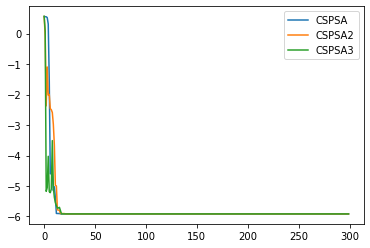

In [17]:
plt.plot(np.array(Result_CSPSA[:]).T, label='CSPSA')
plt.plot(np.array(Result2_CSPSA[:]).T, label='CSPSA2')
plt.plot(np.array(Result3_CSPSA[:]).T, label='CSPSA3')
plt.legend()

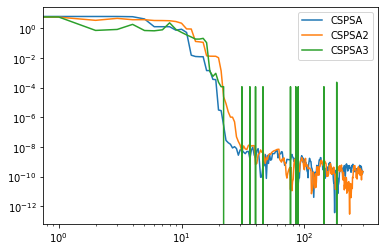

In [18]:
plt.loglog(np.array(error_CSPSA[:]).T, label='CSPSA')
plt.loglog(np.array(error2_CSPSA[:]).T, label='CSPSA2')
plt.loglog(np.array(error3_CSPSA[:]).T, label='CSPSA3')
plt.legend()

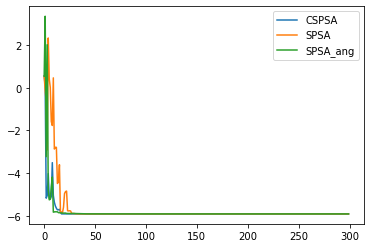

In [19]:
plt.plot(np.array(Result3_CSPSA[:]).T, label='CSPSA')
plt.plot(np.array(Result3_SPSA[:]).T, label='SPSA')
plt.plot(np.array(Result3_SPSA_ang[:]).T, label='SPSA_ang')
plt.legend()

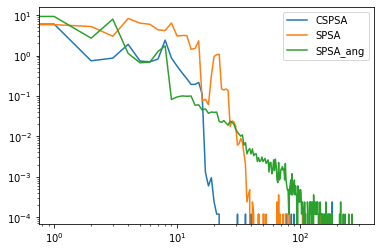

In [20]:
plt.loglog(np.array(error3_CSPSA[:]).T, label='CSPSA')
plt.loglog(np.array(error3_SPSA[:]).T, label='SPSA')
plt.loglog(np.array(error3_SPSA_ang[:]).T, label='SPSA_ang')
plt.legend()

In [21]:
#Result1_CSPSA = CSPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)
#Result1_SPSA = SPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)
#Result1_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [22]:
#Result1_CSPSA2 = CSPSA2(psi_est, NU_IT, fun, fun, s, t, A, b)
#Result1_SPSA2 = SPSA2(psi_est, NU_IT, fun, fun, s, t, A, b)
#Result1_SPSA_ang2 = SPSA_ang2(psi_est, NU_IT, fun, fun, s, t, A, b)

In [23]:
#error1_CSPSA = abs(Result1_CSPSA - Ground_teo)
#error1_SPSA = abs(Result1_SPSA - Ground_teo)
#error1_SPSA_ang = abs(Result1_SPSA_ang - Ground_teo)

In [24]:
#error1_CSPSA2 = abs(Result1_CSPSA2 - Ground_teo)
#error1_SPSA2 = abs(Result1_SPSA2 - Ground_teo)
#error1_SPSA_ang2 = abs(Result1_SPSA_ang2 - Ground_teo)

In [25]:
#plt.loglog(np.array(error1_CSPSA[:]).T, label='CSPSA')
#plt.loglog(np.array(error1_CSPSA2[:]).T, label='CSPSA2')
#plt.legend()

In [26]:
#plt.loglog(np.array(error1_SPSA[:]).T, label='SPSA')
#plt.loglog(np.array(error1_SPSA2[:]).T, label='SPSA2')
#plt.legend()

In [27]:
#plt.loglog(np.array(error1_SPSA_ang[:]).T, label='SPSA_ang')
#plt.loglog(np.array(error1_SPSA_ang2[:]).T, label='SPSA_ang2')
#plt.legend()

In [28]:
#plt.plot(np.array(Result1_CSPSA[:]).T, label='CSPSA')
#plt.plot(np.array(Result1_CSPSA2[:]).T, label='CSPSA2')
#plt.legend()

In [29]:
#plt.plot(np.array(Result1_SPSA[:]).T, label='SPSA')
#plt.plot(np.array(Result1_SPSA2[:]).T, label='SPSA2')
#plt.legend()

In [30]:
#plt.plot(np.array(Result1_SPSA_ang[:]).T, label='SPSA_ang')
#plt.plot(np.array(Result1_SPSA_ang2[:]).T, label='SPSA_ang2')
#plt.legend()

In [31]:
#plt.loglog(np.array(error1_CSPSA[:]).T, label='CSPSA')
#plt.loglog(np.array(error1_SPSA[:]).T, label='SPSA')
#plt.loglog(np.array(error1_SPSA_ang[:]).T, label='SPSA_ang')
#plt.legend()

In [32]:
#plt.loglog(np.array(error1_CSPSA2[:]).T, label='CSPSA2')
#plt.loglog(np.array(error1_SPSA2[:]).T, label='SPSA2')
#plt.loglog(np.array(error1_SPSA_ang2[:]).T, label='SPSA_ang2')
#plt.legend()

In [33]:
#plt.plot(np.array(Result_SPSA_ang[:]).T, label='SPSA_ang')
#plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
#plt.xlim(0,100)
#plt.ylim(-7,-4)
#plt.legend()

# numero de realizaciones para promediar

num = 5


x = range(0,num)
y = len(x)


def multiprocessing_func(i):
    
    Result_CSPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    Result_SPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    Result_SPSA_ang_ar = np.empty((0,1,NU_IT), dtype=np.single)

    error_CSPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    error_SPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    error_SPSA_ang_ar = np.empty((0,1,NU_IT), dtype=np.single)
     
    psi_est = estado(d,nu_par)
    Result_CSPSA = CSPSA2(psi_est, NU_IT, fun, fun, s, t, A, b)
    Result_SPSA = SPSA2(psi_est, NU_IT, fun, fun, s, t, A, b)
    Result_SPSA_ang = SPSA_ang2(psi_est, NU_IT, fun, fun, s, t, A, b)
    
    error_CSPSA = abs(Result_CSPSA - Ground_teo)
    error_SPSA = abs(Result_SPSA - Ground_teo)
    error_SPSA_ang = abs(Result_SPSA_ang - Ground_teo)
    
    Result_CSPSA_ar = np.insert(Result_CSPSA_ar, 0, Result_CSPSA, axis=0)
    Result_SPSA_ar = np.insert(Result_SPSA_ar, 0, Result_SPSA, axis=0)
    Result_SPSA_ang_ar = np.insert(Result_SPSA_ang_ar, 0, Result_SPSA_ang, axis=0)
    
    error_CSPSA_ar = np.insert(error_CSPSA_ar, 0, error_CSPSA, axis=0)
    error_SPSA_ar = np.insert(error_SPSA_ar, 0, error_SPSA, axis=0)
    error_SPSA_ang_ar = np.insert(error_SPSA_ang_ar, 0, error_SPSA_ang, axis=0)
    
    return Result_CSPSA_ar, Result_SPSA_ar, Result_SPSA_ang_ar, error_CSPSA_ar, error_SPSA_ar, error_SPSA_ang_ar

if __name__ == '__main__':
    
    pool = multiprocessing.Pool(2)
    p = pool.map(multiprocessing_func, x, 2)
    pool.close()
    pool.join()
    

Results = np.array(p)

Result_CSPSA_ar = Results[:,0,:,:,:]
Result_SPSA_ar = Results[:,1,:,:,:]
Result_SPSA_ang_ar = Results[:,2,:,:,:]

error_CSPSA_ar = Results[:,3,:,:,:]
error_SPSA_ar = Results[:,4,:,:,:]
error_SPSA_ang_ar = Results[:,5,:,:,:]

Result_CSPSA_pro = np.sum(Result_CSPSA_ar, axis=0)/y
Result_SPSA_pro = np.sum(Result_SPSA_ar, axis=0)/y
Result_SPSA_ang_pro = np.sum(Result_SPSA_ang_ar, axis=0)/y
error_CSPSA_pro = np.sum(error_CSPSA_ar, axis=0)/y
error_SPSA_pro = np.sum(error_SPSA_ar, axis=0)/y
error_SPSA_ang_pro = np.sum(error_SPSA_ang_ar, axis=0)/y


Result_CSPSA = Result_CSPSA_pro[0,0,:]
Result_SPSA = Result_SPSA_pro[0,0,:]
Result_SPSA_ang = Result_SPSA_ang_pro[0,0,:]
error_CSPSA = error_CSPSA_pro[0,0,:]
error_SPSA = error_SPSA_pro[0,0,:]
error_SPSA_ang = error_SPSA_ang_pro[0,0,:]

#plt.loglog(np.array(error_CSPSA_pro[:]).T)

#plt.loglog(np.array(error_SPSA_pro[:]).T)

#plt.loglog(np.array(error_SPSA_ang_pro[:]).T)

plt.loglog(np.array(error_CSPSA[:]).T, label='CSPSA')
plt.loglog(np.array(error_SPSA[:]).T, label='SPSA')
plt.loglog(np.array(error_SPSA_ang[:]).T, label='SPSA_ang')
plt.legend()

plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
plt.plot(np.array(Result_SPSA[:]).T, label='SPSA')
plt.plot(np.array(Result_SPSA_ang[:]).T, label='SPSA_ang')

plt.xlim(0,100)
#plt.ylim(-6.5,-4)
plt.legend()

#np.savetxt('prueba.txt', Result_SPSA, delimiter=',')
#print(Result_SPSA)

#np.savetxt('prueba.txt', Result_CSPSA, delimiter=',')
#print(Result_CSPSA)

#np.savetxt('prueba.txt', Result_SPSA_ang, delimiter=',')
#print(Result_SPSA_ang)